In [16]:
N = (12 + 4 ) % 5 + 1
print(N)

2



Task 3:
Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

Task 4:
                     Id              Year             Count
count NationalNames.csv NationalNames.csv NationalNames.csv
mean  NationalNames.csv NationalNames.csv NationalNames.csv
std   NationalNames.csv NationalNames.csv NationalNames.csv
min   NationalNames.csv NationalNames.csv NationalNames.csv
25%   NationalNames.csv NationalNames.csv NationalNames.csv
50%   NationalNames.csv NationalNames.csv NationalNames.csv
75%   NationalNames.csv NationalNames.csv NationalNames.csv
max   NationalNames.csv NationalNames.csv NationalNames.csv

Task 5:
93889

Task 8:
The name is Linda in 1947

Task 9:
254615

Task 11:
2008

Task 12:
Most Popular Name in 2008: Jacob

Task 14:
Year with the most gender-neutral names: 1880

Task 16:
    Year    Count
77  1957  4200026

Task 17:
Year  Gender
1880  F           90993
      M          110491
1881  F           91954
      M          100745
1882  F          107850
        

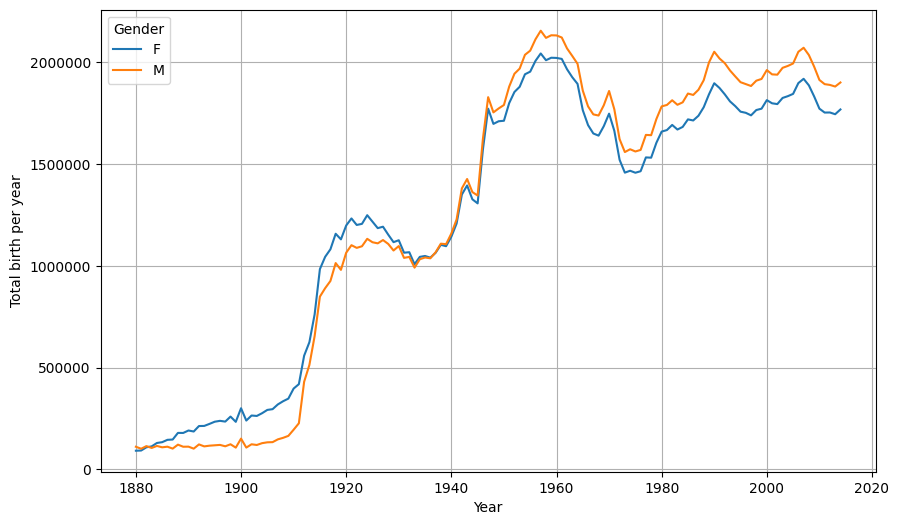


Task: 20
Total Neutral Names in the dataset: 10221

Task 22:
Number of years in the dataset: 135

Task 23:
Series([], Name: Gender, dtype: int64)


C:\Users\Roman\AppData\Local\Temp\ipykernel_16068\1365577670.py:86: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  most_popular_names = df[df.groupby('Name')['Count'].transform(max) == df['Count']]



Task 24:
Most popular name among less popular names: Pricillia

Task: 27
         Year      Name  Count
955      1880      John   9701
2818     1881      John   8795
4735     1882      John   9597
6727     1883      John   8934
8775     1884      John   9428
...       ...       ...    ...
1521288  2010  Isabella  22913
1568092  2011    Sophia  21839
1599369  2012    Sophia  22285
1630271  2013    Sophia  21172
1643629  2014      Emma  20811

[135 rows x 3 columns]


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NationalNames.csv')

# Task 3 Get the column names of the dataset
column_names = df.columns
print("\nTask 3:")
print(column_names)

# Task 4 Get general information about the data in the dataset
description = df.describe()
print("\nTask 4:")
print(description.to_string(float_format='NationalNames.csv'))

# Task 5 Find the number of unique names in the data set
unique_names = df['Name'].nunique()
print("\nTask 5:")
print(unique_names)

# Task 8 Find the most popular name according to the results of one year (the name for which the Count is the maximum)
most_popular = df[df['Count'] == df['Count'].max()]
print("\nTask 8:")
print(f"The name is {most_popular['Name'].values[0]} in {most_popular['Year'].values[0]}")

# Task 9 Count the number of records for which Count is the minimum in the set.
min_count = df['Count'].min()
count_min_records = (df['Count'] == min_count).sum()
print("\nTask 9:")
print(count_min_records)

# Task 11 Find the year with the largest number of unique names.
unique_names_by_year = df.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_by_year.idxmax()
print("\nTask 11:")
print(year_with_most_unique_names)

# Task 12 Find the most popular name in the year with the most unique names (ie 2008)
most_popular_name_in_year_with_most_unique_names = df[df['Year'] == year_with_most_unique_names].groupby('Name')['Count'].sum().idxmax()
print("\nTask 12:")
print(f"Most Popular Name in {year_with_most_unique_names}: {most_popular_name_in_year_with_most_unique_names}")

# Task 14 Find the year with the most gender-neutral names (the same male and female names)
gender_neutral_years = df.groupby('Year')['Gender'].nunique()
max_gender_neutral_year = gender_neutral_years[gender_neutral_years == 2].idxmax()
print("\nTask 14:")
print(f"Year with the most gender-neutral names: {max_gender_neutral_year}")

# Task 16 Find the year when the most children were born
births_per_year = df.groupby('Year')['Count'].sum().reset_index()
biggest_year = births_per_year.sort_values(by='Count', ascending=False).head(1)
print("\nTask 16:")
print(biggest_year)

# Task 17 Find the number of girls and boys born each year
boys_and_girls_by_year = df.groupby(['Year', 'Gender'])['Count'].sum()
print("\nTask 17:")
print(boys_and_girls_by_year)

# Task 18 Count the number of years when girls were born more than boys.
years_with_more_girls = boys_and_girls_by_year.unstack().fillna(0)['F'] > boys_and_girls_by_year.unstack().fillna(0)['M']
count_years_with_more_girls = years_with_more_girls.sum()
print("\nTask 18:")
print(f"Years with more girls than boys: {count_years_with_more_girls}")

# Task 19 Draw a graph of the total number of births of boys and girls per year.
births_per_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(births_per_year_gender['Year'], births_per_year_gender['F'], label='F')
plt.plot(births_per_year_gender['Year'], births_per_year_gender['M'], label='M')
plt.xlabel('Year')
plt.ylabel('Total birth per year')
plt.legend(title='Gender')
plt.grid(True)
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Task 20 Count the number of gender-neutral names (the same for girls and boys)
male_names = set(df[df['Gender'] == 'M']['Name'])
female_names = set(df[df['Gender'] == 'F']['Name'])
neutral_names_count = len(male_names.intersection(female_names))
print("\nTask: 20")
print("Total Neutral Names in the dataset:", neutral_names_count)

# Task 22 Calculate how many years the observation was carried out
years_count = df['Year'].nunique()
print("\nTask 22:")
print(f"Number of years in the dataset: {years_count}")

# Task 23 Know the most popular gender-neutral names (those present every year)
years_count = df['Year'].nunique()
gender_neutral_names = df.groupby('Name')['Gender'].nunique()
gender_neutral_names_all_years = gender_neutral_names[gender_neutral_names == years_count]
print("\nTask 23:")
print(gender_neutral_names_all_years)
most_popular_names = df[df.groupby('Name')['Count'].transform("max") == df['Count']]

# Task 24 Find the most popular among unpopular names (the unpopular name that children were called the most times)
max_count_per_name = df.groupby('Name')['Count'].max()
most_popular_names = df[df.groupby('Name')['Count'].transform(max) == df['Count']]
most_popular_less_popular_name = most_popular_names['Name'].value_counts().idxmax()
print("\nTask 24:")
print(f"Most popular name among less popular names: {most_popular_less_popular_name}")

# Task 27 Find the most popular names in each year.
popular_names_by_year = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()
idx = popular_names_by_year.groupby('Year')['Count'].idxmax()
most_popular_names = popular_names_by_year.loc[idx]
print("\nTask: 27")
print(most_popular_names)